In [12]:
import pandas as pd
import os

path = "./"#path 
all_files = os.listdir(path)#return list 

Data_list = [] # list 
for filename in all_files:
    if filename.endswith(".csv"):#check csv file
        file_path = os.path.join(path, filename)
        Data = pd.read_csv(file_path)#read csv file
        Data_list.append(Data)# store in Data_list
Data = pd.concat(Data_list)#Merged all files
        

/var/folders/xp/2rylt9xj5pg9skp183dqjflc0000gn/T/ipykernel_61750/1673895036.py:11: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv(file_path)#read csv file
/var/folders/xp/2rylt9xj5pg9skp183dqjflc0000gn/T/ipykernel_61750/1673895036.py:11: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv(file_path)#read csv file
/var/folders/xp/2rylt9xj5pg9skp183dqjflc0000gn/T/ipykernel_61750/1673895036.py:11: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv(file_path)#read csv file
/var/folders/xp/2rylt9xj5pg9skp183dqjflc0000gn/T/ipykernel_61750/1673895036.py:11: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv(file_path)#read csv file
/var/folders/xp/2rylt9xj5pg9skp183dqjflc0000gn/T/ipykernel_61750/167

/var/folders/xp/2rylt9xj5pg9skp183dqjflc0000gn/T/ipykernel_61750/1673895036.py:11: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv(file_path)#read csv file
/var/folders/xp/2rylt9xj5pg9skp183dqjflc0000gn/T/ipykernel_61750/1673895036.py:11: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv(file_path)#read csv file
/var/folders/xp/2rylt9xj5pg9skp183dqjflc0000gn/T/ipykernel_61750/1673895036.py:11: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv(file_path)#read csv file
/var/folders/xp/2rylt9xj5pg9skp183dqjflc0000gn/T/ipykernel_61750/1673895036.py:11: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv(file_path)#read csv file
/var/folders/xp/2rylt9xj5pg9skp183dqjflc0000gn/T/ipykernel_61750/167

In [13]:
Data.shape#summary

(4844304, 71)

In [14]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4844304 entries, 0 to 890
Data columns (total 71 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Unnamed: 0                           int64  
 1   Recording timestamp                  int64  
 2   Computer timestamp                   int64  
 3   Sensor                               object 
 4   Project name                         object 
 5   Export date                          object 
 6   Participant name                     object 
 7   Recording name                       object 
 8   Recording date                       object 
 9   Recording date UTC                   object 
 10  Recording start time                 object 
 11  Recording start time UTC             object 
 12  Recording duration                   int64  
 13  Timeline name                        object 
 14  Recording Fixation filter name       object 
 15  Recording software version          

In [15]:
Data.isnull().sum()#null values 

Unnamed: 0                          0
Recording timestamp                 0
Computer timestamp                  0
Sensor                           3171
Project name                        0
                               ...   
Fixation point Y              2273158
Fixation point X (MCSnorm)    2493153
Fixation point Y (MCSnorm)    2493153
Mouse position X              4792191
Mouse position Y              4792191
Length: 71, dtype: int64

In [16]:
th = int(0.7 * len(Data)) #70% threshold value 
print(th)

3391012


In [17]:
Data.dropna(axis=1, thresh = th,  inplace= True) # drop coloum which have more than 70% threshold

In [18]:
Data.drop_duplicates(inplace=True)# duplicate value drop down

<AxesSubplot:>

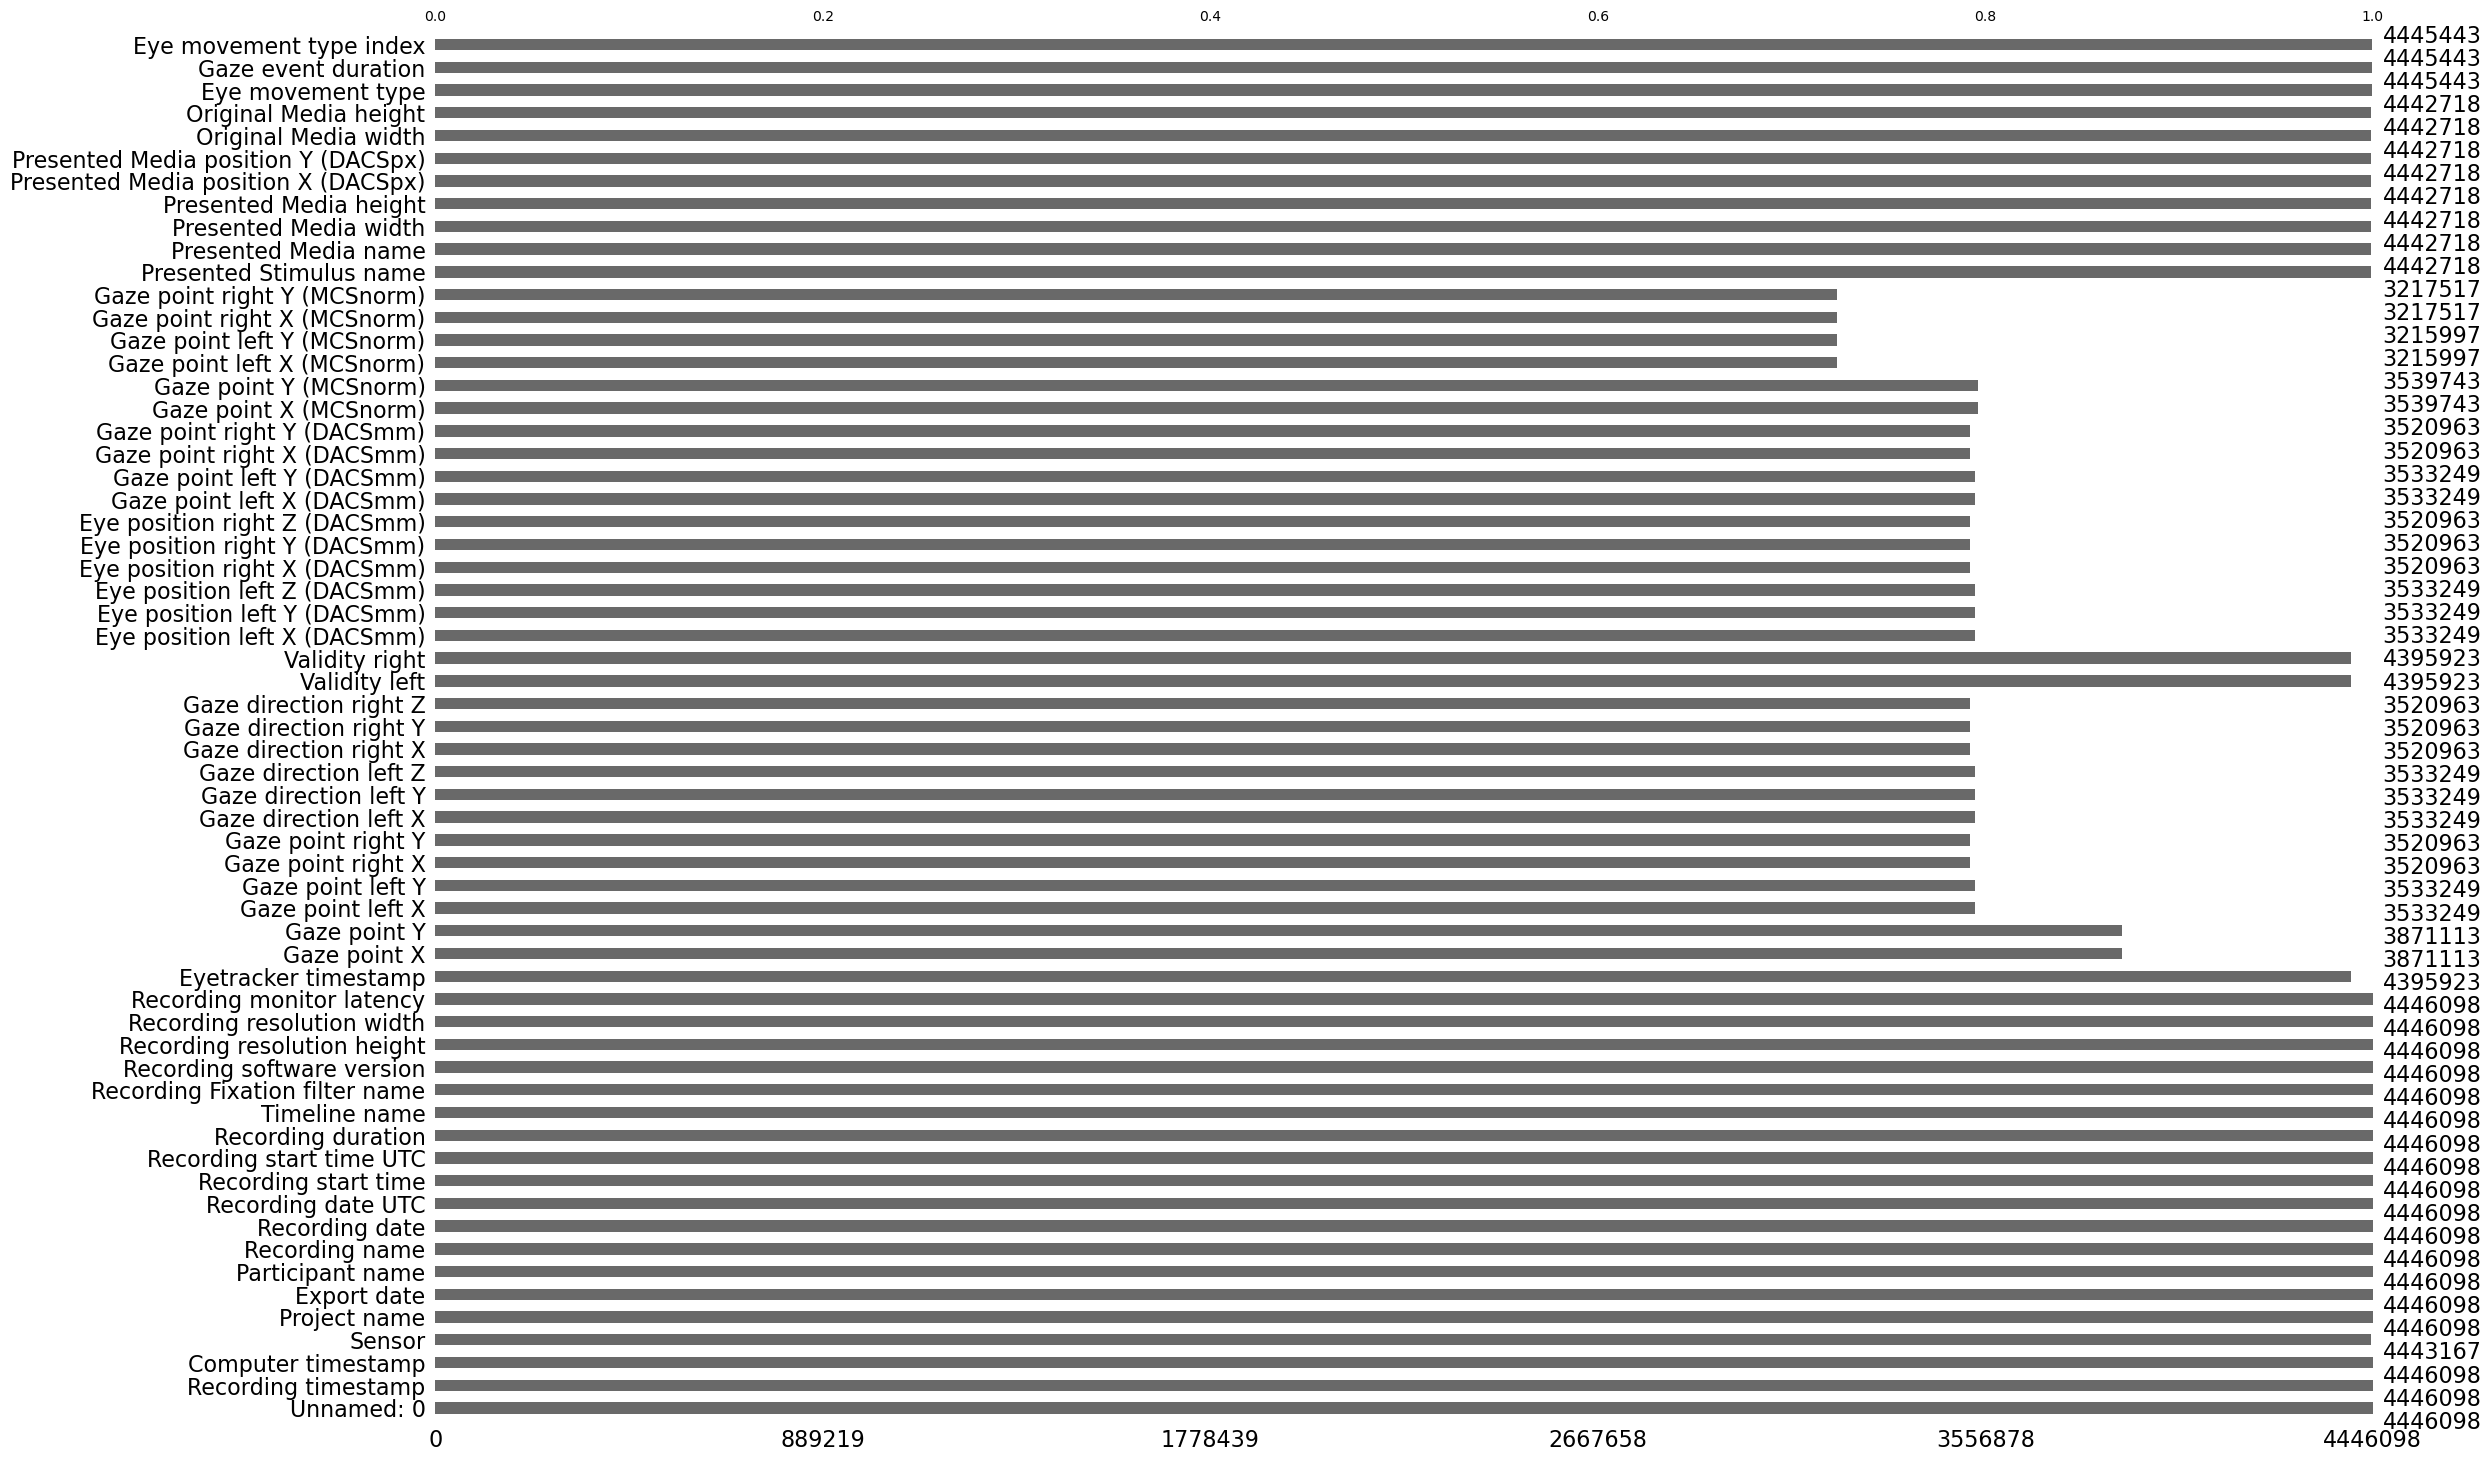

In [19]:
import missingno as msno
msno.bar(Data)# percentage of missing values for each column in the Data

In [20]:
Data.fillna(1, inplace=True)# all null values with zerp

In [21]:
#categorial columns
data_types = Data.dtypes
categorical_columns = []
for column in Data.columns:
    if data_types[column] == 'object':
        categorical_columns.append(column)

# Print categorical columns
print('Categorical columns:', categorical_columns) #find catagerorial column

Categorical columns: ['Sensor', 'Project name', 'Export date', 'Participant name', 'Recording name', 'Recording date', 'Recording date UTC', 'Recording start time', 'Recording start time UTC', 'Timeline name', 'Recording Fixation filter name', 'Recording software version', 'Recording monitor latency', 'Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X', 'Gaze direction right Y', 'Gaze direction right Z', 'Validity left', 'Validity right', 'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)', 'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)', 'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)', 'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Presented Sti

In [22]:
Data.describe()#descriptive statistics for a Data


,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Gaze point right X,Gaze point right Y,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index
count,4.446098e+06,4.446098e+06,4.446098e+06,4.446098e+06,4446098.0,4446098.0,4.446098e+06,4.446098e+06,4.446098e+06,4.446098e+06,...,4.446098e+06,4.446098e+06,4.446098e+06,4.446098e+06,4.446098e+06,4.446098e+06,4.446098e+06,4.446098e+06,4.446098e+06,4.446098e+06
mean,8.315025e+04,5.869822e+07,7.324193e+11,1.106025e+05,1080.0,1920.0,4.840627e+09,7.921484e+02,3.894690e+02,6.690029e+02,...,7.728813e+02,3.495307e+02,1.517590e+03,1.102780e+03,2.008152e+02,-1.180429e+01,1.527660e+03,1.114273e+03,2.467452e+02,3.940732e+02
std,9.861196e+04,4.226560e+07,9.674388e+11,5.102491e+04,0.0,0.0,1.352497e+10,4.103743e+02,3.095047e+02,4.319016e+02,...,4.726654e+02,3.115956e+02,2.306830e+02,2.355253e+02,1.135088e+02,1.168288e+02,6.261638e+02,4.961843e+02,5.955845e+02,5.641934e+02
min,3.470000e+02,2.414233e+06,5.120924e+08,1.412400e+04,1080.0,1920.0,1.000000e+00,-3.810000e+02,-2.160000e+02,-3.810000e+02,...,-2.900000e+02,-2.160000e+02,1.000000e+00,1.000000e+00,-7.470000e+02,-1.168000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.237900e+04,2.675092e+07,2.012167e+09,6.613200e+04,1080.0,1920.0,1.074986e+09,5.620000e+02,9.600000e+01,3.560000e+02,...,4.960000e+02,1.000000e+00,1.493000e+03,1.080000e+03,2.140000e+02,0.000000e+00,8.970000e+02,6.490000e+02,2.500000e+01,9.400000e+01
50%,5.105300e+04,4.864584e+07,4.366728e+11,1.030950e+05,1080.0,1920.0,1.640533e+09,8.840000e+02,3.970000e+02,7.770000e+02,...,9.140000e+02,3.500000e+02,1.493000e+03,1.080000e+03,2.140000e+02,0.000000e+00,2.000000e+03,1.447000e+03,1.170000e+02,1.970000e+02
75%,9.657000e+04,7.969654e+07,1.301607e+12,1.470690e+05,1080.0,1920.0,3.334103e+09,1.020000e+03,6.290000e+02,9.330000e+02,...,1.078000e+03,5.960000e+02,1.493000e+03,1.080000e+03,2.140000e+02,0.000000e+00,2.000000e+03,1.447000e+03,2.750000e+02,4.280000e+02
max,5.298970e+05,2.332096e+08,4.234413e+12,2.333600e+05,1080.0,1920.0,8.072037e+10,2.304000e+03,2.374000e+03,2.304000e+03,...,2.304000e+03,2.374000e+03,3.415000e+03,3.415000e+03,4.200000e+02,1.000000e+00,3.415000e+03,3.415000e+03,1.428300e+04,5.126000e+03


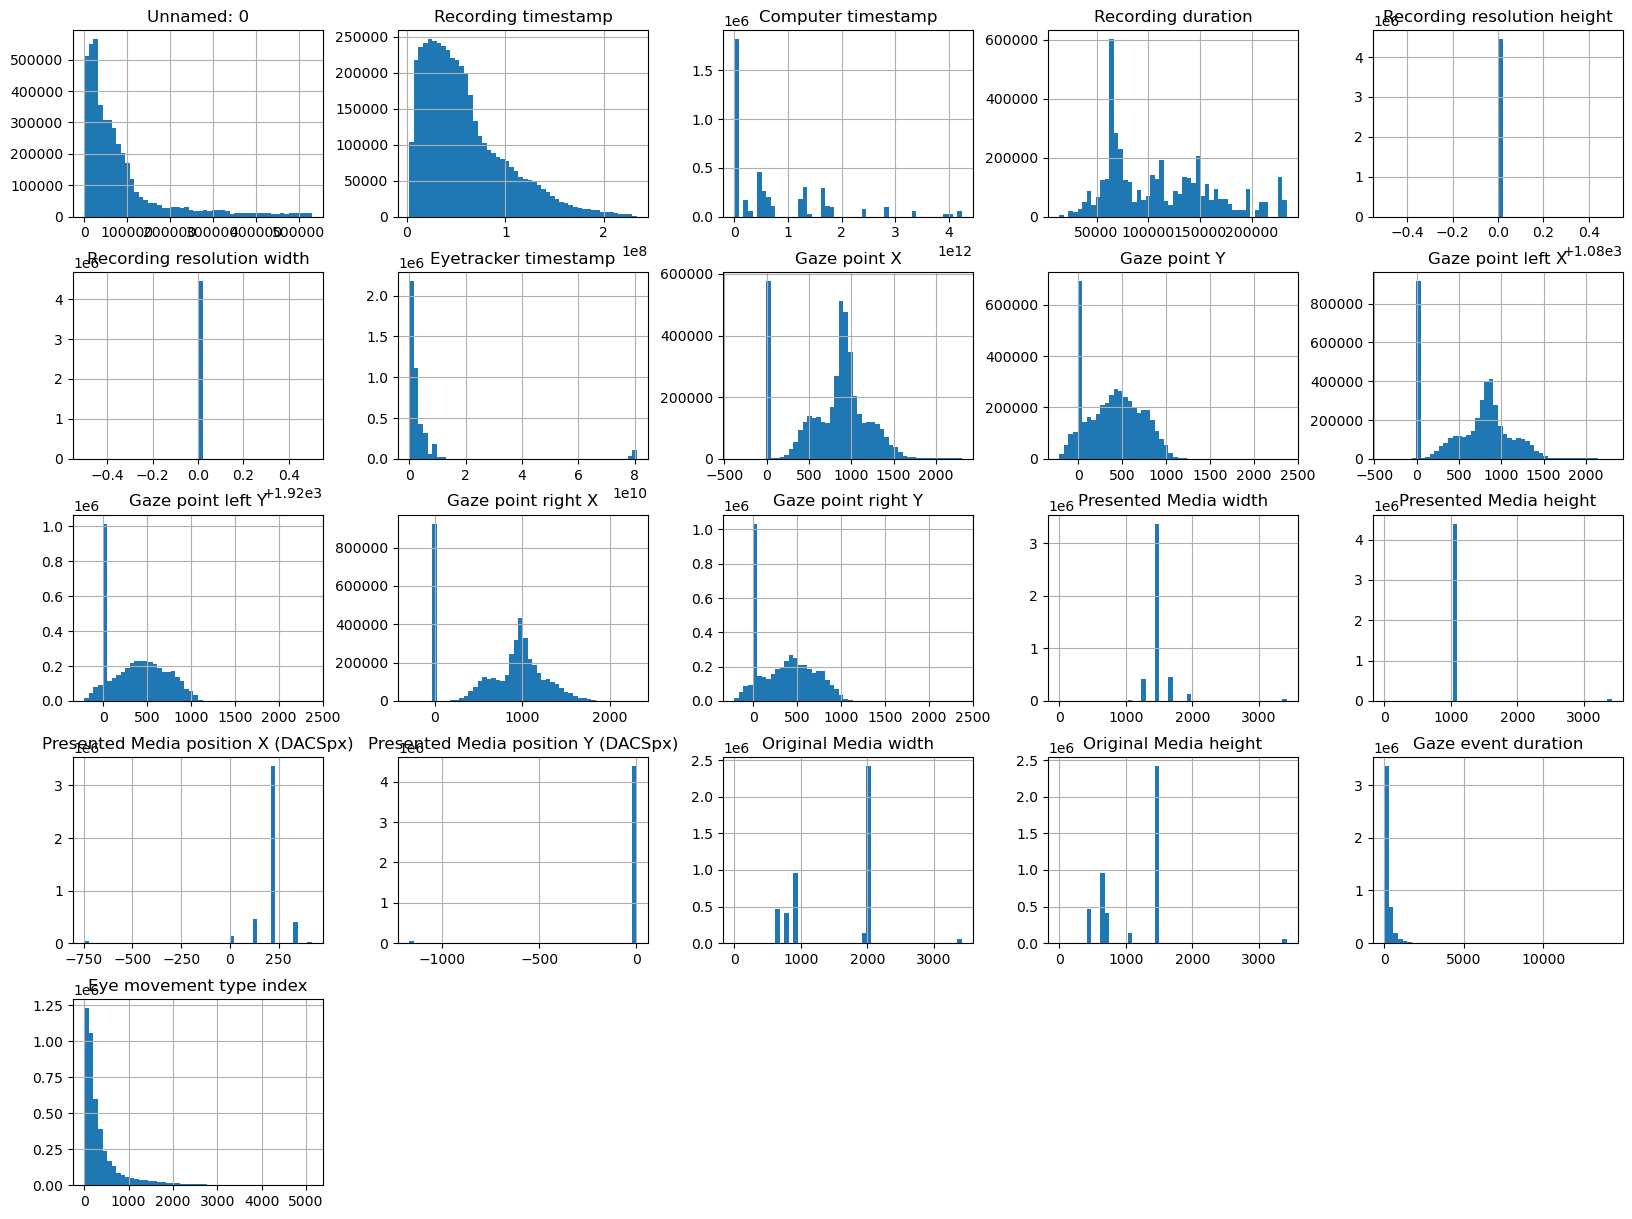

In [23]:
_ = Data.hist(bins=50, figsize=(20,15))#histogram


In [24]:
Data.head(100)#first 100 data

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Presented Media name,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index
0,93678,7183002,188368002977,1,Participant0019,05.02.2021,Participant0019,Recording7,05.02.2021,05.02.2021,...,1,1.0,1.0,1.0,1.0,1.0,1.0,Fixation,233.0,15.0
1,93679,7183002,188368002977,1,Participant0019,05.02.2021,Participant0019,Recording7,05.02.2021,05.02.2021,...,1,1.0,1.0,1.0,1.0,1.0,1.0,Fixation,233.0,15.0
2,93680,7186970,188368006945,Eye Tracker,Participant0019,05.02.2021,Participant0019,Recording7,05.02.2021,05.02.2021,...,103111957_1133015250388940_5990313860353693579...,1493.0,1080.0,214.0,0.0,2000.0,1447.0,Fixation,233.0,15.0
3,93681,7191787,188368011762,Mouse,Participant0019,05.02.2021,Participant0019,Recording7,05.02.2021,05.02.2021,...,103111957_1133015250388940_5990313860353693579...,1493.0,1080.0,214.0,0.0,2000.0,1447.0,Fixation,233.0,15.0
4,93682,7195344,188368015319,Eye Tracker,Participant0019,05.02.2021,Participant0019,Recording7,05.02.2021,05.02.2021,...,103111957_1133015250388940_5990313860353693579...,1493.0,1080.0,214.0,0.0,2000.0,1447.0,Fixation,233.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93773,7861933,188368681908,Eye Tracker,Participant0019,05.02.2021,Participant0019,Recording7,05.02.2021,05.02.2021,...,103111957_1133015250388940_5990313860353693579...,1493.0,1080.0,214.0,0.0,2000.0,1447.0,Fixation,150.0,17.0
96,93774,7870228,188368690203,Eye Tracker,Participant0019,05.02.2021,Participant0019,Recording7,05.02.2021,05.02.2021,...,103111957_1133015250388940_5990313860353693579...,1493.0,1080.0,214.0,0.0,2000.0,1447.0,Fixation,150.0,17.0
97,93775,7878562,188368698537,Eye Tracker,Participant0019,05.02.2021,Participant0019,Recording7,05.02.2021,05.02.2021,...,103111957_1133015250388940_5990313860353693579...,1493.0,1080.0,214.0,0.0,2000.0,1447.0,Fixation,150.0,17.0
98,93776,7886923,188368706898,Eye Tracker,Participant0019,05.02.2021,Participant0019,Recording7,05.02.2021,05.02.2021,...,103111957_1133015250388940_5990313860353693579...,1493.0,1080.0,214.0,0.0,2000.0,1447.0,Fixation,150.0,17.0


In [25]:
features = ['Sensor', 'Project name', 'Export date', 'Participant name', 'Recording name', 'Recording start time', 'Recording start time UTC', 'Timeline name', 'Recording Fixation filter name', 'Recording software version', 'Recording monitor latency', 'Presented Media name', 'Eye movement type']
Data[features].head()

,Sensor,Project name,Export date,Participant name,Recording name,Recording start time,Recording start time UTC,Timeline name,Recording Fixation filter name,Recording software version,Recording monitor latency,Presented Media name,Eye movement type
0,1,Participant0019,05.02.2021,Participant0019,Recording7,15:24:28.123,14:24:28.123,Timeline1,Tobii I-VT (Fixation),1.145.28180,"10,00",1,Fixation
1,1,Participant0019,05.02.2021,Participant0019,Recording7,15:24:28.123,14:24:28.123,Timeline1,Tobii I-VT (Fixation),1.145.28180,"10,00",1,Fixation
2,Eye Tracker,Participant0019,05.02.2021,Participant0019,Recording7,15:24:28.123,14:24:28.123,Timeline1,Tobii I-VT (Fixation),1.145.28180,"10,00",103111957_1133015250388940_5990313860353693579...,Fixation
3,Mouse,Participant0019,05.02.2021,Participant0019,Recording7,15:24:28.123,14:24:28.123,Timeline1,Tobii I-VT (Fixation),1.145.28180,"10,00",103111957_1133015250388940_5990313860353693579...,Fixation
4,Eye Tracker,Participant0019,05.02.2021,Participant0019,Recording7,15:24:28.123,14:24:28.123,Timeline1,Tobii I-VT (Fixation),1.145.28180,"10,00",103111957_1133015250388940_5990313860353693579...,Fixation


In [26]:

#correlation matrix
corr_matrix = Data.corr()
# Remove highly correlated features
corr_threshold = 0.8
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
Data1=Data.drop(columns=corr_features, inplace=True)
corr_matrix#print matrix


,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Gaze point right X,Gaze point right Y,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index
Unnamed: 0,1.000000,0.097849,-0.285826,0.107760,NaN,NaN,-0.023862,0.042825,0.132473,0.061565,...,0.010118,0.111720,-0.016666,-0.031467,0.018506,0.032139,0.145091,0.123208,-0.032187,0.113811
Recording timestamp,0.097849,1.000000,-0.026418,0.602799,NaN,NaN,0.022013,-0.019442,0.022425,-0.016415,...,-0.030866,0.007443,0.125608,0.081805,-0.128788,-0.083437,0.262653,0.233416,-0.001115,0.478749
Computer timestamp,-0.285826,-0.026418,1.000000,-0.025535,NaN,NaN,0.088505,-0.002192,-0.036019,-0.008806,...,0.030921,-0.022073,-0.041493,-0.026497,0.042000,0.026755,0.128544,0.118269,0.055013,-0.117122
Recording duration,0.107760,0.602799,-0.025535,1.000000,NaN,NaN,0.041513,-0.044743,0.006340,-0.038169,...,-0.037192,-0.000953,0.138547,0.076532,-0.138292,-0.076324,0.396093,0.348589,0.008820,0.264513
Recording resolution height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recording resolution width,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eyetracker timestamp,-0.023862,0.022013,0.088505,0.041513,NaN,NaN,1.000000,0.016926,-0.030174,0.021388,...,0.018389,-0.026630,-0.026609,-0.020420,0.029124,0.021737,0.074112,0.067362,-0.014190,-0.037450
Gaze point X,0.042825,-0.019442,-0.002192,-0.044743,NaN,NaN,0.016926,1.000000,0.297946,0.822709,...,0.793659,0.276936,0.025212,0.012963,-0.015023,-0.007287,-0.082547,-0.076142,-0.114329,-0.144753
Gaze point Y,0.132473,0.022425,-0.036019,0.006340,NaN,NaN,-0.030174,0.297946,1.000000,0.228215,...,0.269536,0.884459,-0.002576,0.002199,0.009712,0.001562,0.021888,0.018772,-0.081451,-0.045463
Gaze point left X,0.061565,-0.016415,-0.008806,-0.038169,NaN,NaN,0.021388,0.822709,0.228215,1.000000,...,0.599852,0.178424,0.035407,0.012396,-0.027410,-0.007827,-0.069496,-0.067180,-0.075485,-0.132059


In [27]:
from sklearn.model_selection import train_test_split
#training and testing
train_set, test_set = train_test_split(Data, test_size=0.2, random_state=23)  

print(len(train_set), len(test_set))

3556878 889220


In [28]:
Data = train_set.copy()#copy training data

In [29]:
Data.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Presented Stimulus name,Presented Media name,Presented Media width,Original Media width,Eye movement type,Gaze event duration,Eye movement type index
2665,60032,27043658,1301771383649,Eye Tracker,Participant0029,18.02.2021,Participant0029,Recording5,18.02.2021,18.02.2021,...,"0,6223","0,1349","0,5705",103111957_1133015250388940_5990313860353693579_n,103111957_1133015250388940_5990313860353693579...,1493.0,2000.0,Unclassified,58.0,133.0
4694,35043,42739981,1794807584,Eye Tracker,Participant0041,18.03.2021,Participant0041,Recording4,18.03.2021,18.03.2021,...,1,1,1,103111957_1133015250388940_5990313860353693579_n,103111957_1133015250388940_5990313860353693579...,1493.0,2000.0,EyesNotFound,8.0,716.0
17900,80870,155028911,1223890206948,Eye Tracker,Participant0027,17.02.2021,Participant0027,Recording5,17.02.2021,17.02.2021,...,"0,7497","0,1036","0,7124",103111957_1133015250388940_5990313860353693579_n,103111957_1133015250388940_5990313860353693579...,1493.0,2000.0,Fixation,208.0,409.0
5669,8751,70180541,558853612,Eye Tracker,Test group experiment,01.10.2020,Participant0001,Recording1,24.09.2020,24.09.2020,...,"0,1267","0,6060","0,1337",e-tranboard0,e-tranboard.png,1493.0,897.0,Unclassified,8.0,486.0
1841,63554,25660319,188104805166,Eye Tracker,Participant0019,05.02.2021,Participant0019,Recording5,05.02.2021,05.02.2021,...,"0,8018","0,2054","0,8261",103111957_1133015250388940_5990313860353693579...,103111957_1133015250388940_5990313860353693579...,1493.0,2000.0,Fixation,108.0,69.0


In [30]:
#encoding using one hot encoder
from sklearn.preprocessing import OneHotEncoder
Data= Data.sample(frac=0.10, random_state=42)
Data.head()

Data[categorical_columns] = Data[categorical_columns].astype(str)

encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')
encoded_features = encoder.fit_transform(Data[categorical_columns])
encoded_features = pd.DataFrame(encoded_features)

Data_sample = Data.reset_index(drop=True)

encoded_features = encoded_features.reset_index(drop=True)

# Concatenae the one-hot encoded features with the original dataframe
Datas = pd.concat([Data_sample.drop(columns=categorical_columns), encoded_features], axis=1)
Datas

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point right X,Presented Media width,Original Media width,Gaze event duration,Eye movement type index,0
0,4781,38710923,3377168274340,68636,1080,1920,3.901243e+08,754.0,108.0,829.0,1245.0,798.0,50.0,169.0,"(0, 1)\t1.0\n (0, 34)\t1.0\n (0, 69)\t1.0\..."
1,10407,82601340,571274411,83579,1080,1920,5.690540e+08,632.0,370.0,651.0,1493.0,897.0,33.0,602.0,"(0, 1)\t1.0\n (0, 53)\t1.0\n (0, 85)\t1.0\..."
2,14539,118202399,1654093226198,119610,1080,1920,2.863154e+09,1360.0,452.0,1360.0,1493.0,2000.0,92.0,601.0,"(0, 1)\t1.0\n (0, 52)\t1.0\n (0, 75)\t1.0\..."
3,55302,65790469,4234323720861,105246,1080,1920,1.577657e+09,932.0,413.0,1061.0,1493.0,2000.0,375.0,148.0,"(0, 1)\t1.0\n (0, 35)\t1.0\n (0, 84)\t1.0\..."
4,23342,79034242,1672403611,132714,1080,1920,1.677376e+09,1.0,1.0,1.0,1493.0,2000.0,367.0,74.0,"(0, 1)\t1.0\n (0, 31)\t1.0\n (0, 74)\t1.0\..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355683,6665,25286377,1308558360015,65001,1080,1920,7.184558e+08,1162.0,-12.0,1.0,1493.0,897.0,17.0,112.0,"(0, 1)\t1.0\n (0, 37)\t1.0\n (0, 70)\t1.0\..."
355684,122307,110227543,1069052680,112853,1080,1920,1.061979e+09,1.0,1.0,1.0,1493.0,897.0,8.0,933.0,"(0, 1)\t1.0\n (0, 53)\t1.0\n (0, 54)\t1.0\..."
355685,106651,47382446,925501727,65697,1080,1920,9.184332e+08,958.0,144.0,1134.0,1493.0,897.0,200.0,107.0,"(0, 1)\t1.0\n (0, 53)\t1.0\n (0, 76)\t1.0\..."
355686,69605,28917566,1361616430,89755,1080,1920,1.359370e+09,937.0,362.0,979.0,1493.0,897.0,308.0,82.0,"(0, 1)\t1.0\n (0, 53)\t1.0\n (0, 82)\t1.0\..."
